In [1]:
# https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [5]:
#df = pd.read_csv("Data/Googletrends.csv", skiprows=1)

df = pd.read_csv("Data/Googletrends.csv")
df.head()

,Month,diet,gym,finance
0,2004-01,100,30,49
1,2004-02,74,27,48
2,2004-03,69,24,45
3,2004-04,70,23,45
4,2004-05,71,23,44


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
Month      183 non-null object
diet       183 non-null int64
gym        183 non-null int64
finance    183 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


## Data Wrangling

In [8]:
# as month is not datatime column so convert it to one
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
Month      183 non-null datetime64[ns]
diet       183 non-null int64
gym        183 non-null int64
finance    183 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.8 KB


In [10]:
df.head()

,Month,diet,gym,finance
0,2004-01-01,100,30,49
1,2004-02-01,74,27,48
2,2004-03-01,69,24,45
3,2004-04-01,70,23,45
4,2004-05-01,71,23,44


In [13]:
df.set_index('Month', inplace=True)
df.head()

,diet,gym,finance
Month,,,
2004-01-01,100,30,49
2004-02-01,74,27,48
2004-03-01,69,24,45
2004-04-01,70,23,45
2004-05-01,71,23,44


## EDA 

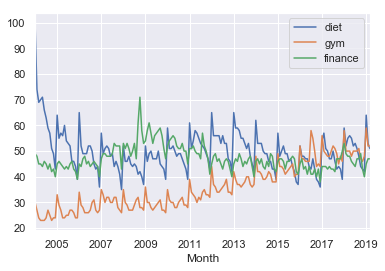

In [14]:
df.plot()

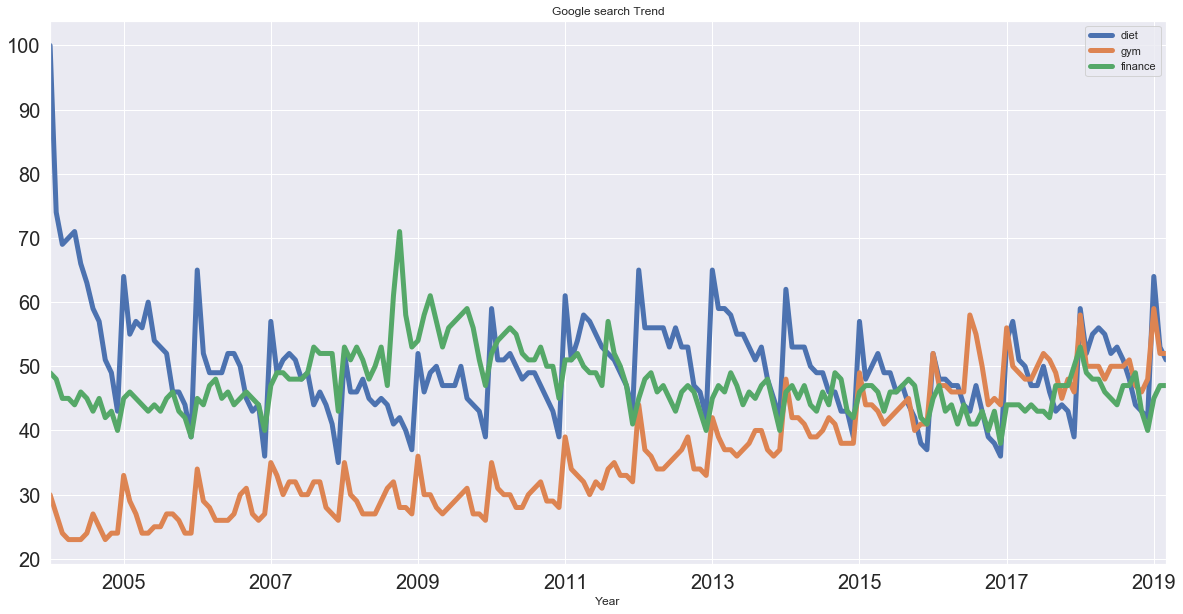

In [22]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20 )
plt.title("Google search Trend")
plt.xlabel("Year")

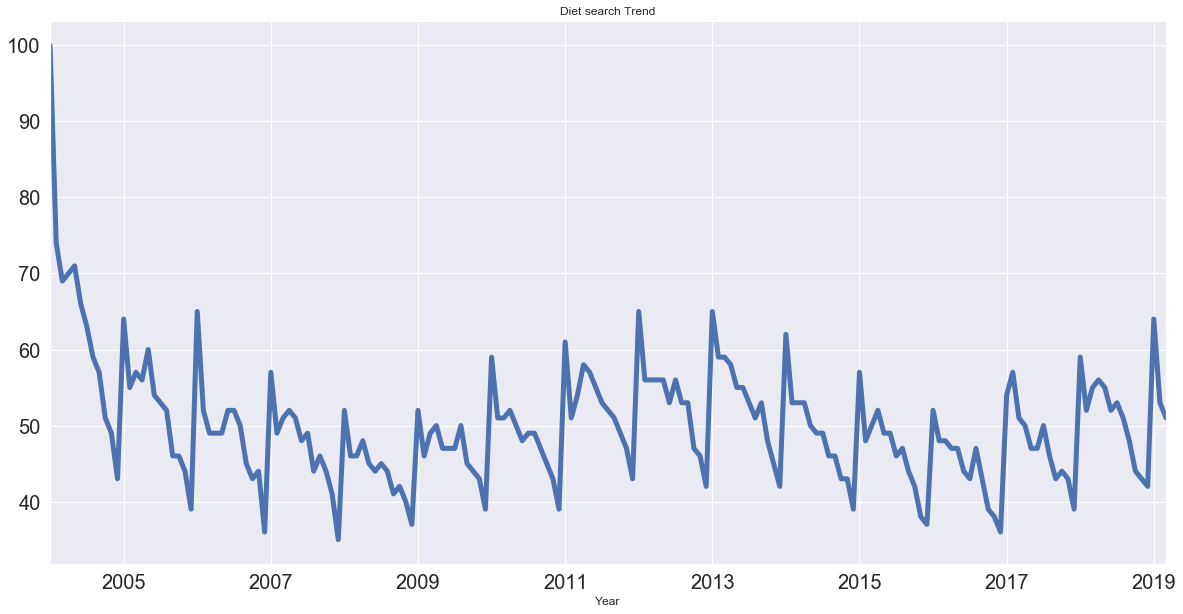

In [24]:
df.diet.plot(figsize=(20,10), linewidth=5, fontsize=20 )
plt.title('Diet search Trend')
plt.xlabel('Year')

Note that there is seasonality: each January, there's a big jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

### Identifying Trends in Time Series
There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

Since this is yearly data so take wondow soze as 12

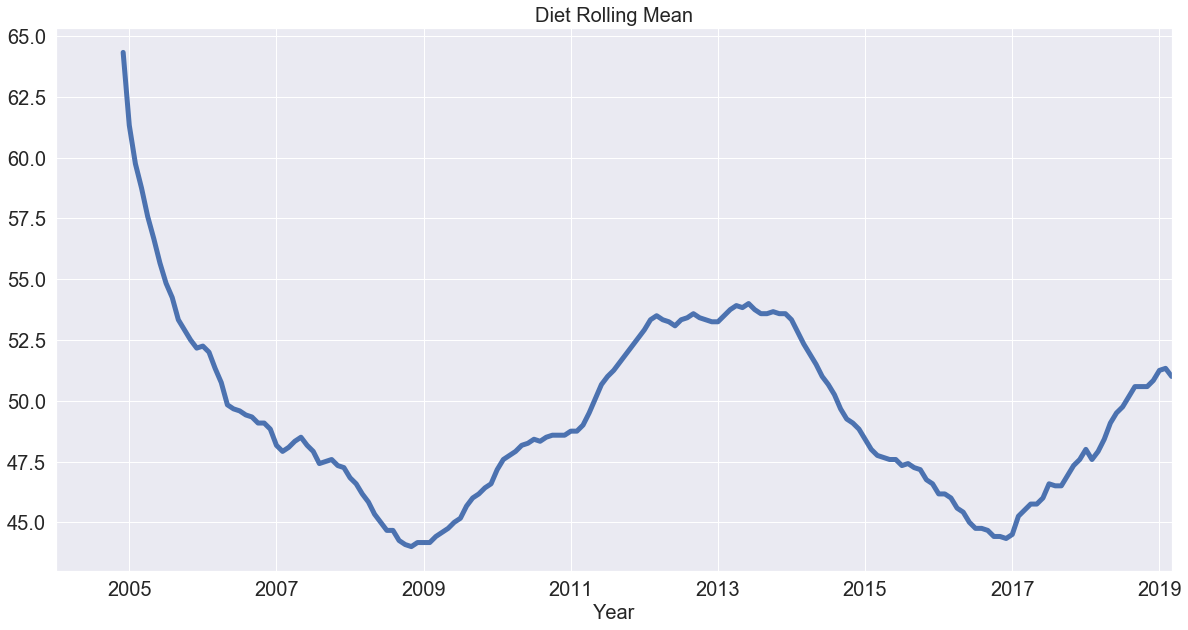

In [30]:
diet = df.diet
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.title('Diet Rolling Mean', fontsize=20)
plt.xlabel('Year', fontsize=20)

### Removed Seasonality and just have Trend

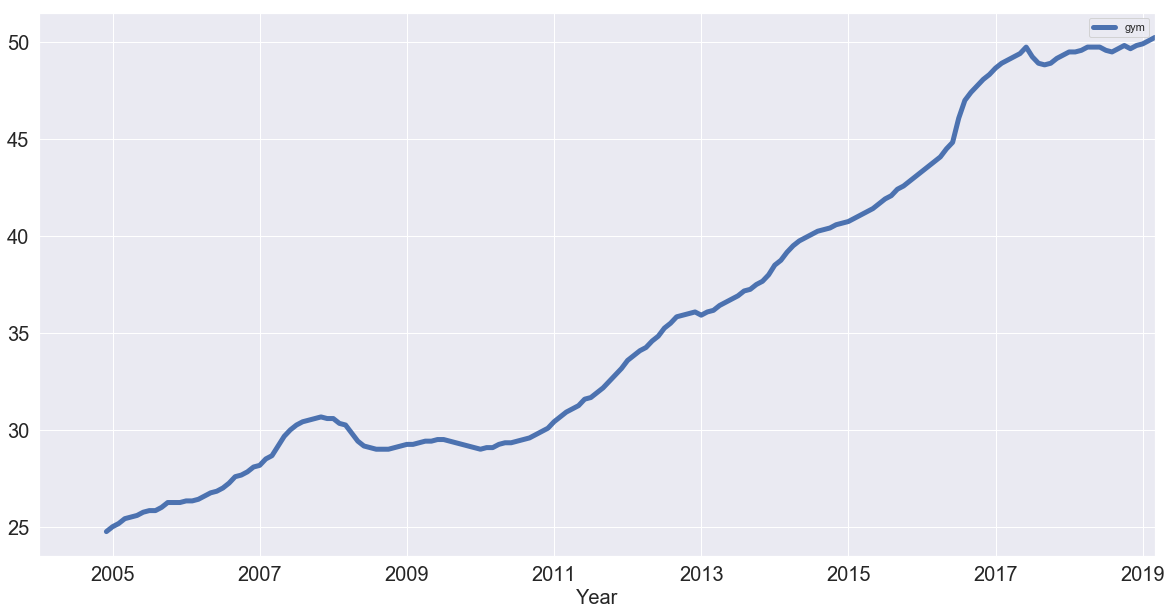

In [32]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

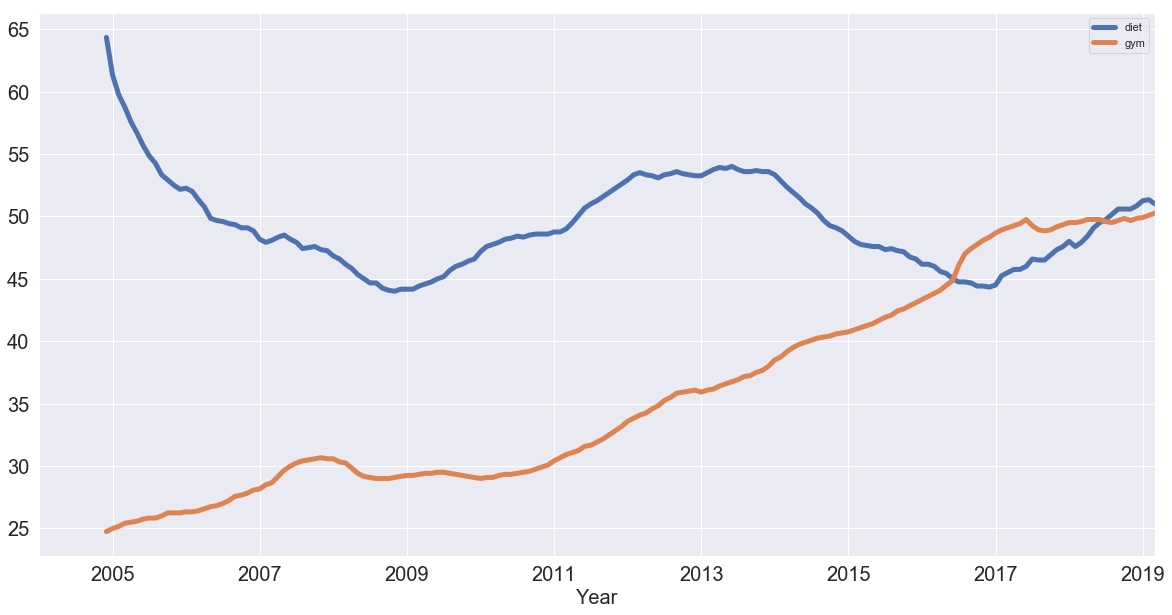

In [34]:
## Compare Diet + Gym

df_concat = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)

df_concat.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### Seasonal Patterns in Time Series Data
One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

### First-order differencing

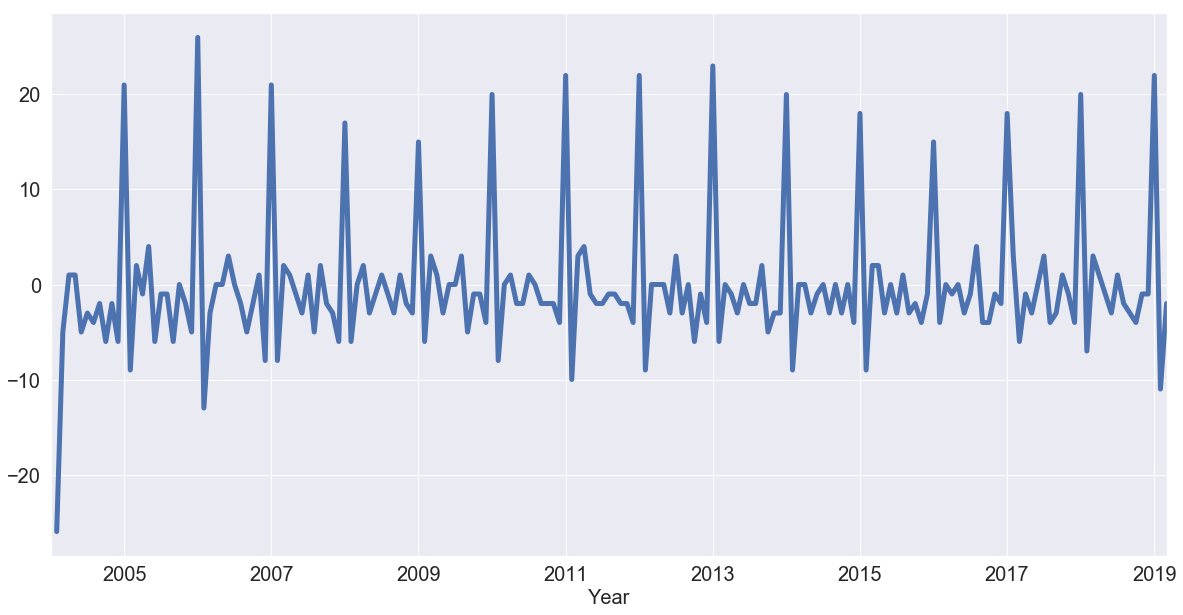

In [35]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Differencing is super helpful in turning your time series into a stationary time series. You won't get too much into these here but a stationary time series is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.



Periodicity and Autocorrelation
A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

In [36]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.038094,0.002369
gym,-0.038094,1.000000,-0.263137
finance,0.002369,-0.263137,1.000000


Let's focus on 'diet' and 'gym'; They are negatively correlated. That's very interesting! Remember that you have a seasonal and a trend component. From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

The actual correlation coefficient is actually capturing both of those.

What you want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

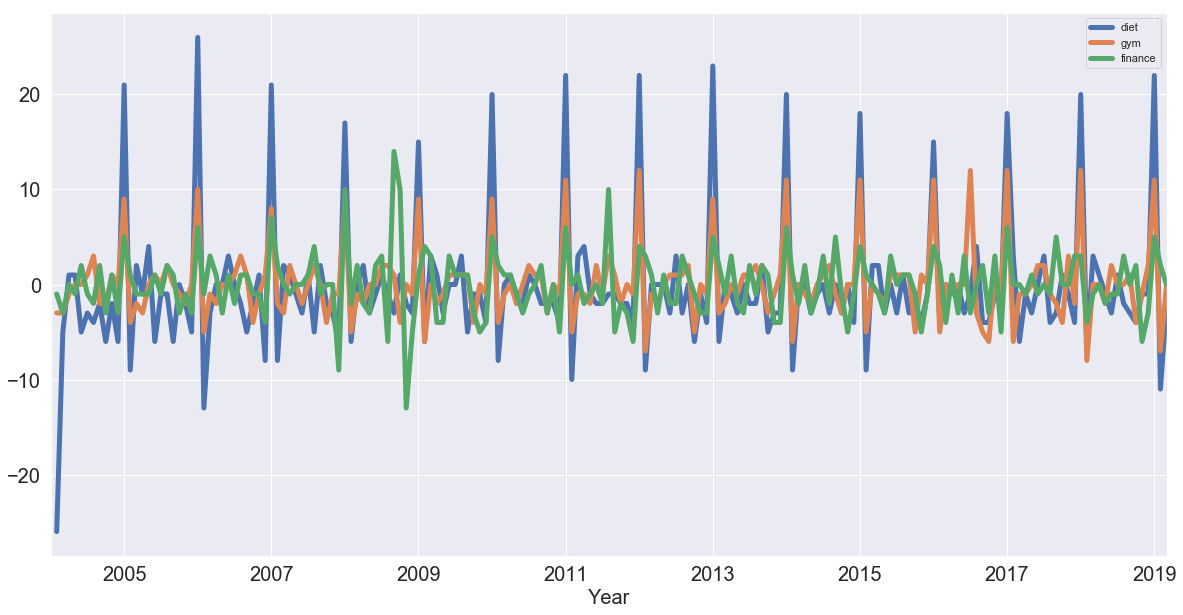

In [37]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:



In [38]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.788367,0.408849
gym,0.788367,1.000000,0.342852
finance,0.408849,0.342852,1.000000


Note that once again, there was a slight negative correlation when you were thinking about the trend and the seasonal component. Now, you can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.76.

Autocorrelation
Now you've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

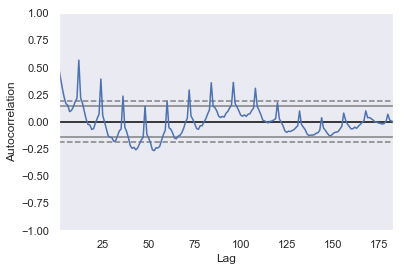

In [39]:
pd.plotting.autocorrelation_plot(diet);

f you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. You have another peak at a 24 month interval, where it's also correlated with itself. You have another peak at 36, but as you move further away, there's less and less of a correlation.

Of course, you have a correlation of itself with itself at a lag of 0.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

You have identified the seasonality of this 12 month repetition!